# Task 1: Hypothesis testing and confidence intervals

Conduct hypothesis tests and calculate confidence intervals for the Heart Disease UCI dataset.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [103]:
df.dropna(subset=['chol', 'num'], inplace=True)
# df.num.isna().sum()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [13]:
df.dataset.value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [14]:
df.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [15]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [16]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [17]:
df.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


<Axes: >

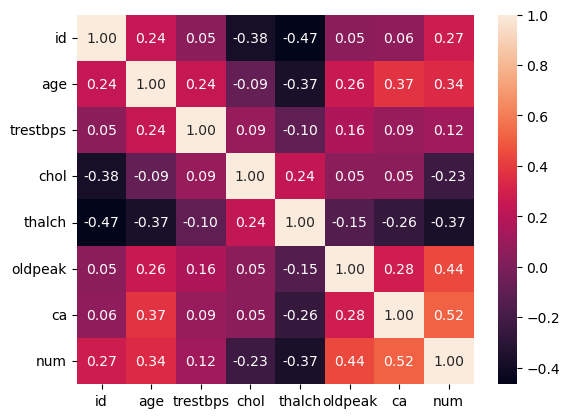

In [22]:
correlations = df.corr()

sns.heatmap(correlations, annot=True, fmt=".2f")

In [23]:
# dropping unnecessary
df.drop(['id'], axis='columns', inplace=True)

In [24]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [25]:
pd.crosstab(df.num, df.sex)

sex,Female,Male
num,,
0,144,267
1,30,235
2,10,99
3,8,99
4,2,26


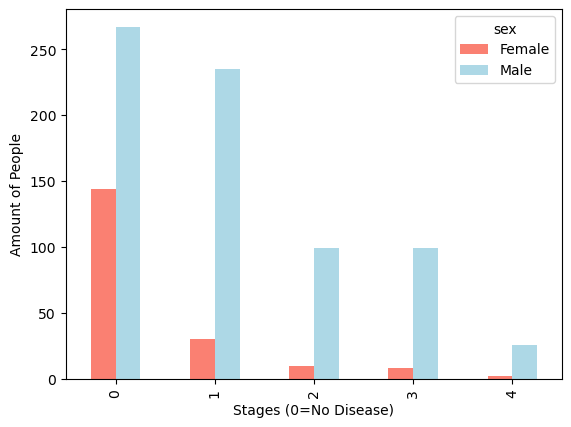

In [58]:
pd.crosstab(df.num, df.sex).plot(kind="bar", color=['salmon', 'lightblue'])
plt.xlabel("Stages (0=No Disease)")
plt.ylabel("Amount of People")
plt.show()

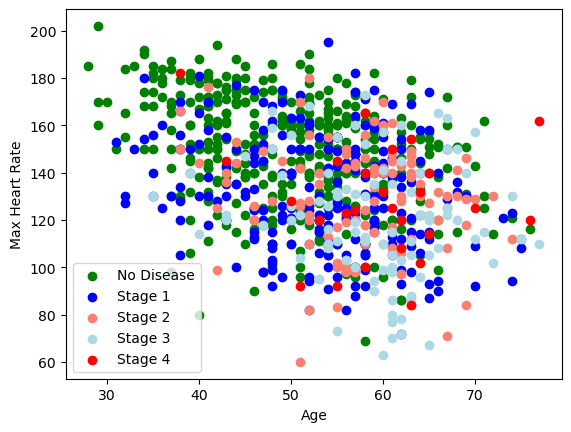

In [49]:
# Compare Age vs max Heart Rate(thalch)

plt.scatter(df.age[df.num==0], df.thalch[df.num==0], c='green')
plt.scatter(df.age[df.num==1], df.thalch[df.num==1], c='blue')
plt.scatter(df.age[df.num==2], df.thalch[df.num==2], c='salmon')
plt.scatter(df.age[df.num==3], df.thalch[df.num==3], c='lightblue')
plt.scatter(df.age[df.num==4], df.thalch[df.num==4], c='red')

plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
plt.show()

In [56]:
# Heart Disease per chest pain
pd.crosstab(df.cp, df.num)

num,0,1,2,3,4
cp,,,,,
asymptomatic,104,197,89,83,23
atypical angina,150,19,2,3,0
non-anginal,131,37,14,18,4
typical angina,26,12,4,3,1


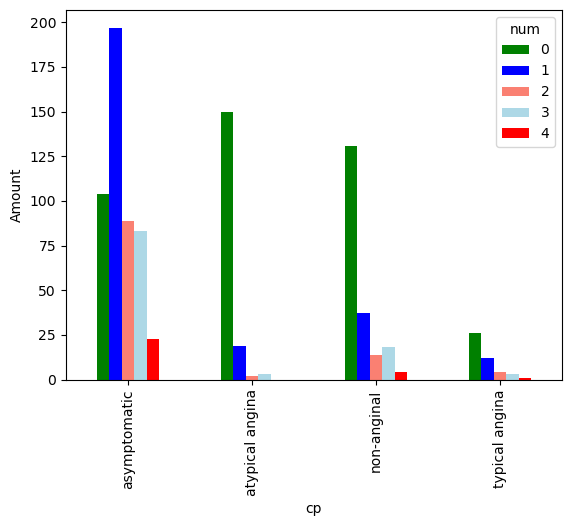

In [62]:
pd.crosstab(df.cp, df.num).plot(kind="bar", color=['green','blue','salmon', 'lightblue', 'red'])
plt.ylabel("Amount")
plt.show()

In [64]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [90]:
# Age Wise Hypothesis Testing
stages_mean = df.groupby("num")['age'].mean()
stages_mean

stages_std = df.groupby("num")['age'].std()
stages_std

stages_df = pd.DataFrame({'Stage':[0,1,2,3,4], 'Age Mean': stages_mean.values, 'Age Std': stages_std.values,
                          'Sample Size':[ len(df.age[df.num==0]), len(df.age[df.num==1]), len(df.age[df.num==2]),
                                        len(df.age[df.num==3]), len(df.age[df.num==4]) ] })
stages_df

,Stage,Age Mean,Age Std,Sample Size
0,0,50.547445,9.433700,411
1,1,53.528302,8.740371,265
2,2,57.577982,7.786852,109
3,3,59.214953,7.990594,107
4,4,59.214286,8.283661,28


**Null Hypothesis (H0):** There is no significant difference in cholesterol levels between patients with and without heart disease.

**Alternative Hypothesis (H1):** There is a significant difference in cholesterol levels between patients with and without heart disease.

Since we want to compare the cholesterol levels (numerical variable) between two groups (patients with and without heart disease), we will use an **independent t-test.**

In [104]:
from scipy.stats import ttest_ind

noheart_disease = df[df.num == 0]['chol']
heart_disease = df[df.num > 0]['chol']

# perform independent t-test
t_stat, p_value = ttest_ind(heart_disease, noheart_disease)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -7.061510014417096
p-value: 3.323201042049721e-12
